In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display 
import matplotlib.pyplot as plt
plt.close('all')
from pathlib import Path

In [ ]:
# Run the following lines in the terminal if package is not installed:
# python (or py) -m pip install matplotlib
# same format applies for any other missing package

In [ ]:
# Intial data loading, cleaning and viewing

data = pd.read_csv(r"Data\bank-additional-full.csv", sep=';') 
print(f"Successfully loaded data: {data.shape[0]} rows, {data.shape[1]} columns")
print(f"Initial columns: {data.columns.tolist()}")

data_copy = data.copy()

data_copy.columns = data_copy.columns.str.lower().str.replace(' ', '_', regex=False).str.replace('[^0-9a-zA-Z_]', '', regex=True)

print("\nSample of cleaned data (first few rows):")
display(data_copy.head(5)) # Just used for debugging to check what the DataFrame look like 

# Side note, if we want to change data types, we can do so here. For example:
# data_copy['age'] = pd.to_numeric(data_copy['age'], errors='coerce).astype('object')

print(f"\nData types after cleaning:\n{data_copy.dtypes}") # Show what the data types of the columnds are after cleaning 
print(f"\nFinal columns available for use: {data_copy.columns.tolist()}")

Successfully loaded data: 41188 rows, 21 columns
Initial columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Sample of cleaned data (first few rows):


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



Data types after cleaning:
age               int64
job              object
marital          object
education        object
default          object
housing          object
loan             object
contact          object
month            object
day_of_week      object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
empvarrate      float64
conspriceidx    float64
consconfidx     float64
euribor3m       float64
nremployed      float64
y                object
dtype: object

Final columns available for use: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'empvarrate', 'conspriceidx', 'consconfidx', 'euribor3m', 'nremployed', 'y']


Shape: (41188, 21)
Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Target counts:
 y
no     36548
yes     4640
Name: count, dtype: int64

Positive (yes) rate: 11.265%

Conversion rate by poutcome (top 5):
 poutcome
success        0.651129
failure        0.142286
nonexistent    0.088322
Name: y, dtype: float64

Conversion rate by contact:
 contact
cellular     0.147376
telephone    0.052313
Name: y, dtype: float64

Conversion rate by job (top 5):
 job
student       0.314286
retired       0.252326
unemployed    0.142012
admin.        0.129726
management    0.112175
Name: y, dtype: float64

Conversion rate by month (top 5):
 month
mar    0.505495
dec    0.489011
sep    0.449123
oct    0.438719
apr    0.204787
Name: y, dtype: float64

Conversion rate by day_of_week:
 day_of_week
thu    

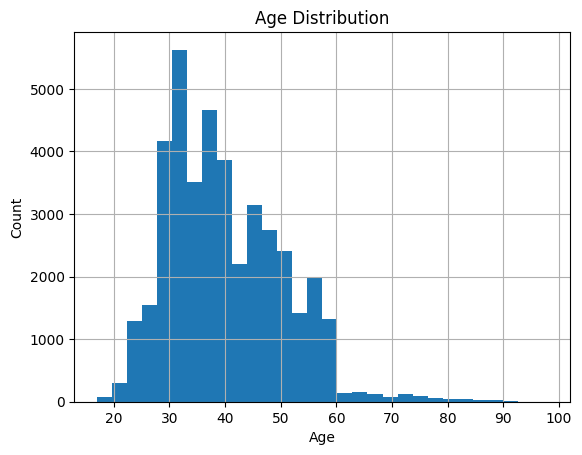

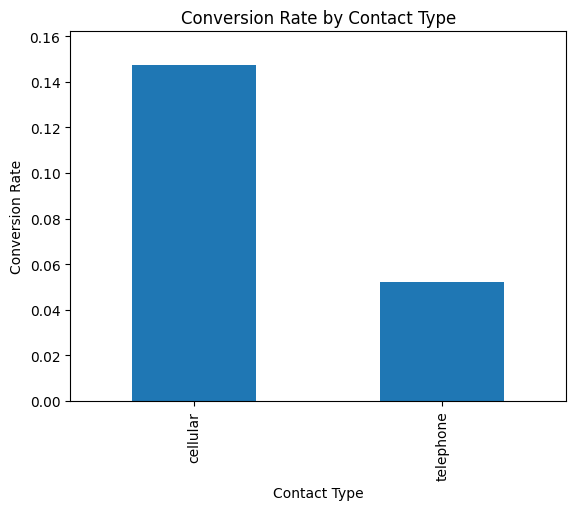

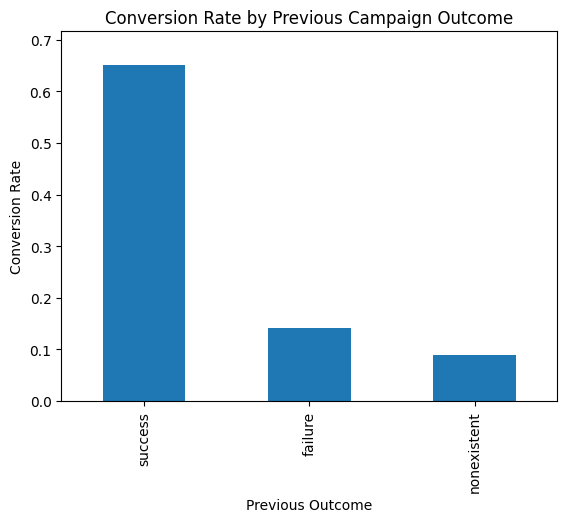

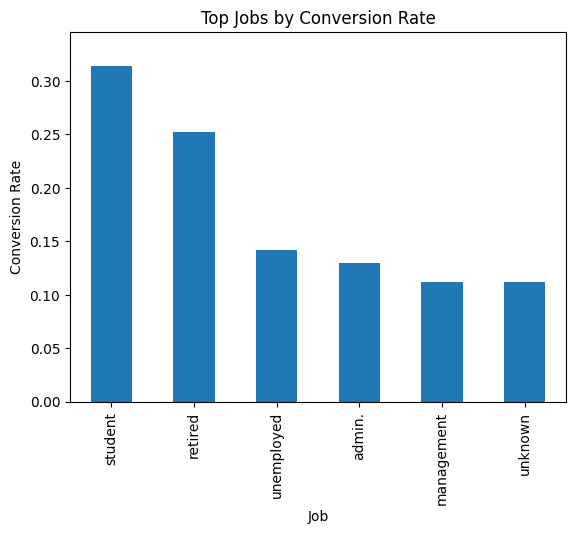

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
# The intial exploration of the full dataset used in the proposal

# Paths
base = Path("Data")
paths = {
    "bank": base / "bank.csv",
    "bank_full": base / "bank-full.csv",
    "bank_additional": base / "bank-additional.csv",
    "bank_additional_full": base / "bank-additional-full.csv",
}

# Load the main working dataset (20 inputs, ordered by date)
df = pd.read_csv(paths["bank_additional_full"], sep=';')

# Basic shape and columns
shape = df.shape
columns = df.columns.tolist()

# Target distribution
target_counts = df['y'].value_counts().sort_index()
target_rate = (df['y'] == 'yes').mean()


# Basic numeric summary (selected columns that commonly exist in the "additional" dataset)
numeric_cols = [c for c in df.columns if df[c].dtype != 'object']
numeric_summary = df[numeric_cols].describe().T

# Grouped conversion rates for a few informative categorical features
def conv_rate_by(col):
    if col in df.columns:
        tmp = df.groupby(col)['y'].apply(lambda s: (s=='yes').mean()).sort_values(ascending=False)
        return tmp
    else:
        return pd.Series(dtype=float)


cr_poutcome = conv_rate_by('poutcome')
cr_contact = conv_rate_by('contact')
cr_job = conv_rate_by('job')
cr_month = conv_rate_by('month')
cr_day_of_week = conv_rate_by('day_of_week') if 'day_of_week' in df.columns else pd.Series(dtype=float)

# Print key stats
print("Shape:", shape)
print("Columns:", columns)
print("\nTarget counts:\n", target_counts)
print(f"\nPositive (yes) rate: {target_rate:.3%}")
if len(cr_poutcome):
    print("\nConversion rate by poutcome (top 5):\n", cr_poutcome.head())
if len(cr_contact):
    print("\nConversion rate by contact:\n", cr_contact)
if len(cr_job):
    print("\nConversion rate by job (top 5):\n", cr_job.head())
if len(cr_month):
    print("\nConversion rate by month (top 5):\n", cr_month.head())
if len(cr_day_of_week):
    print("\nConversion rate by day_of_week:\n", cr_day_of_week)


# Plots
# 1) Histogram of age (if present)
if 'age' in df.columns:
    plt.figure()
    df['age'].dropna().hist(bins=30)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

# 2) Bar: conversion rate by contact
if len(cr_contact):
    plt.figure()
    cr_contact.plot(kind='bar')
    plt.title("Conversion Rate by Contact Type")
    plt.xlabel("Contact Type")
    plt.ylabel("Conversion Rate")
    plt.ylim(0, max(0.05, float(cr_contact.max()) * 1.1))
    plt.show()

# 3) Bar: conversion rate by poutcome (top 4 categories)
if len(cr_poutcome):
    plt.figure()
    cr_poutcome.head(4).plot(kind='bar')
    plt.title("Conversion Rate by Previous Campaign Outcome")
    plt.xlabel("Previous Outcome")
    plt.ylabel("Conversion Rate")
    plt.ylim(0, max(0.05, float(cr_poutcome.head(4).max()) * 1.1))
    plt.show()

# 4) Bar: conversion rate by job (top 6)
if len(cr_job):
    plt.figure()
    cr_job.head(6).plot(kind='bar')
    plt.title("Top Jobs by Conversion Rate")
    plt.xlabel("Job")
    plt.ylabel("Conversion Rate")
    plt.ylim(0, max(0.05, float(cr_job.head(6).max()) * 1.1))
    plt.show()

# Show a compact numeric summary for quick reference
numeric_summary.head(10)